In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers


# 1 . Data clean

In [6]:
datos = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\adult.csv",
                              delimiter= ",", decimal= ".")

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
datos.rename(columns={  "education.num"     : "education_num",
                        "marital.status"    : "marital_status",
                        "capital.gain"      : "capital_gain",
                        "capital.loss"      : "capital_loss",
                        "hours.per.week"    : "hours_per_week",
                        "native.country"    : "native_country",
                    }, inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
datos["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

# Balanceando el dataset

In [10]:
indices_menores = datos[datos.income=="<=50K"].sample(7841).index
datos_menores   = datos.iloc[indices_menores,]
indices_mayores = datos[datos.income==">50K"].index
datos_mayores   = datos.iloc[indices_mayores,]

datos_analisis = pd.concat([datos_menores, datos_mayores])
datos_analisis = datos_analisis.sample(len(datos_analisis))
datos_analisis.reset_index(inplace=True)
datos_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           15682 non-null  int64 
 1   age             15682 non-null  int64 
 2   workclass       15682 non-null  object
 3   fnlwgt          15682 non-null  int64 
 4   education       15682 non-null  object
 5   education_num   15682 non-null  int64 
 6   marital_status  15682 non-null  object
 7   occupation      15682 non-null  object
 8   relationship    15682 non-null  object
 9   race            15682 non-null  object
 10  sex             15682 non-null  object
 11  capital_gain    15682 non-null  int64 
 12  capital_loss    15682 non-null  int64 
 13  hours_per_week  15682 non-null  int64 
 14  native_country  15682 non-null  object
 15  income          15682 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.9+ MB


In [11]:
datos_analisis["income"].value_counts()

<=50K    7841
>50K     7841
Name: income, dtype: int64

<AxesSubplot: xlabel='income', ylabel='capital_gain'>

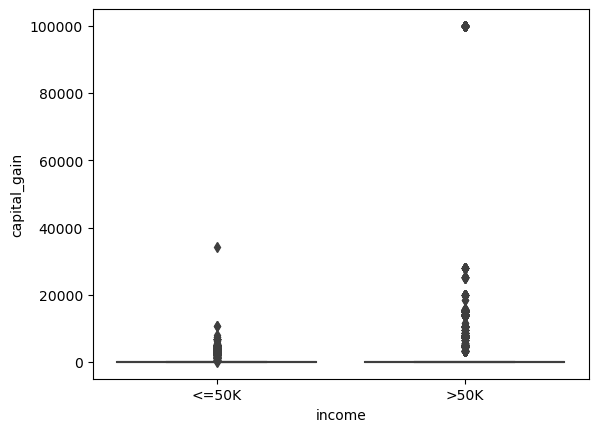

In [18]:
sns.boxplot(data=datos_analisis, x="income", y="capital_gain")

In [21]:
pd.crosstab(datos_analisis.income, datos_analisis.sex)

sex,Female,Male
income,,
<=50K,3048,4793
>50K,1179,6662


In [22]:
pd.crosstab(datos_analisis.income, datos_analisis.workclass)

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,546,186,477,1,5605,154,577,292,3
>50K,191,371,617,0,4963,622,724,353,0
